[53.13289591 10.94254078  9.73148789]
[0.86498424 0.07697122 0.03751759]


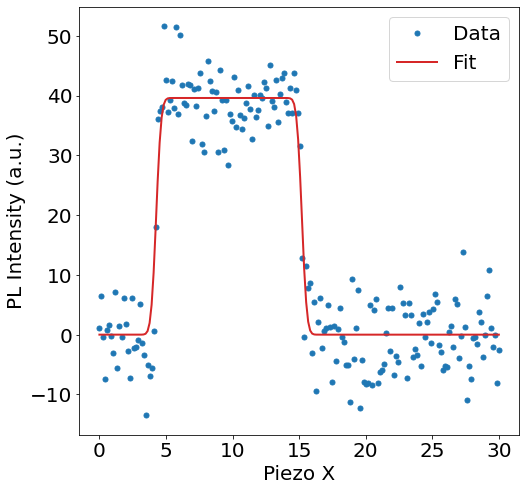

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
from scipy.optimize import curve_fit

def generate_equation(x, a, w, d, c):
    """
    a: amplitude
    w: fwhm of the gaussian
    d: width of the top-hat
    c: center of the top-hat
    """
    return 0.25 * a * w * np.sqrt(np.pi / np.log(2)) * (
        erf(np.sqrt(np.log(2)) * (-2 * c + d + 2 * x) / w) +
        erf(np.sqrt(np.log(2)) * (2 * c + d - 2 * x) / w)
    )

def fit_equation(x, a, d, c):
    """
    a: amplitude
    d: width of the top-hat
    c: center of the top-hat
    """
    w = 0.7
    return 0.25 * a * w * np.sqrt(np.pi / np.log(2)) * (
        erf(np.sqrt(np.log(2)) * (-2 * c + d + 2 * x) / w) +
        erf(np.sqrt(np.log(2)) * (2 * c + d - 2 * x) / w)
    )

# Generate some example data
fitting_range = 30  # nm
x_data = np.linspace(0, fitting_range, 200)
y_true = generate_equation(x_data, 92, 0.4, 11, 9.7) + np.random.normal(0, 5, len(x_data))

# Fit the data to the model
p0 = [100, 10, 8]  # Initial guess for parameters
params, covariance = curve_fit(fit_equation, x_data, y_true, p0=p0)
uncertainties = np.sqrt(np.diag(covariance))

print(params)
print(uncertainties)

# Plot the original data and the fitted function
# plt.plot(x_data, y_true, label='Data')
# plt.plot(x_data, fit_equation(x_data, *params), label='Fit')
plt.rcParams.update({'font.size': 20})
cm = 1/2.54 
plt.figure(figsize=(20*cm, 20*cm))
plt.xlabel('Piezo X')
plt.ylabel('PL Intensity (a.u.)')
plt.plot(x_data, y_true, 'C0o', markersize = 5, label='Data')  # Blue dots for data
plt.plot(x_data, fit_equation(x_data, *params), 'C3-', lw = 2, label='Fit')  # Red line for fit
plt.legend()
plt.show()


In [31]:
import scipy.io

# Replace 'your_file.mat' with the actual path to your MATLAB file
mat_file_path = 'opt 6-15.mat'

# Load the MATLAB file
mat_contents = scipy.io.loadmat(mat_file_path)
mat_variables = scipy.io.whosmat(mat_file_path)

# Display the variable names and their attributes
for variable in mat_variables:
    print("Variable Name:", variable[0])
    print("Variable Type:", variable[1])
    print("Variable Size:", variable[2])

# You can choose which variable to load based on this information



Variable Name: data
Variable Type: (1, 1)
Variable Size: struct
Variable Name: __function_workspace__
Variable Type: (1, 1208)
Variable Size: uint8


In [32]:
# Load the MATLAB file
mat_contents = scipy.io.loadmat(mat_file_path)

# Access the 'data' struct
data_struct = mat_contents['data']

# Print the names of all fields within the 'data' struct
for field_name in data_struct.dtype.names:
    print("Field Name:", field_name)



Field Name: class
Field Name: axes
Field Name: scans
Field Name: inputs
Field Name: intTimes
Field Name: flags
Field Name: name
Field Name: data
Field Name: index
Field Name: info
Field Name: other


Scans: [32.41410498 32.66488868 32.91567238 33.16645608 33.41723978 33.66802348
 33.91880718 34.16959088 34.42037458 34.67115828 34.92194197 35.17272567
 35.42350937 35.67429307 35.92507677 36.17586047 36.42664417 36.67742787
 36.92821157 37.17899527 37.42977896 37.68056266 37.93134636 38.18213006
 38.43291376 38.68369746 38.93448116 39.18526486 39.43604856 39.68683226
 39.93761596 40.18839965 40.43918335 40.68996705 40.94075075 41.19153445
 41.44231815 41.69310185 41.94388555 42.19466925 42.44545295 42.69623665
 42.94702034 43.19780404 43.44858774 43.69937144 43.95015514 44.20093884
 44.45172254 44.70250624 44.95328994 45.20407364 45.45485733 45.70564103
 45.95642473 46.20720843 46.45799213 46.70877583 46.95955953 47.21034323
 47.46112693 47.71191063 47.96269433 48.21347802 48.46426172 48.71504542
 48.96582912 49.21661282 49.46739652 49.71818022 49.96896392 50.21974762
 50.47053132 50.72131502 50.97209871 51.22288241 51.47366611 51.72444981
 51.97523351 52.22601721 52.47680091 52.7275

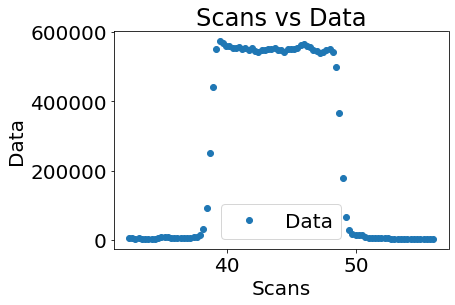

In [33]:
# Access the 'data' struct
data_struct = mat_contents['data']

# Access the inner array of 'scans'
scans = np.array(data_struct['scans'][0, 0][0][0][0])[115:210]

# Access 'data' array within the 'data' struct
data = np.array(data_struct['data'][0, 0][0][0]).flatten()[115:210]

# Display the values
print("Scans:", scans)
print("Data:", data)

# Plot the data
plt.plot(scans, data, 'o', label='Data')  # 'o' for plotting points
plt.xlabel('Scans')
plt.ylabel('Data')
plt.title('Scans vs Data')
plt.legend()
plt.show()


In [34]:
len(data)

95

[7.42268134e+05 1.01404179e+01 4.37715266e+01]
[1.73906753e+03 1.06504203e-02 5.18015598e-03]


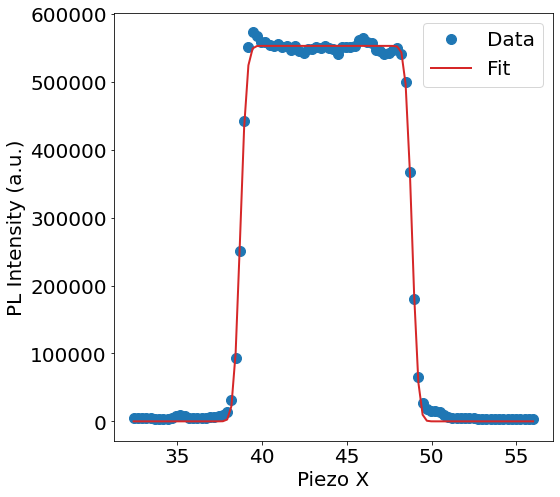

In [35]:
# Fit the data to the model
p0 = [400000, 10, 45]  # Initial guess for parameters
params, covariance = curve_fit(fit_equation, scans, data, p0=p0)
uncertainties = np.sqrt(np.diag(covariance))

print(params)
print(uncertainties)


plt.rcParams.update({'font.size': 20})
cm = 1/2.54 
plt.figure(figsize=(20*cm, 20*cm))
plt.xlabel('Piezo X')
plt.ylabel('PL Intensity (a.u.)')
plt.plot(scans, data, 'C0o', markersize = 10, label='Data')  # Blue dots for data
plt.plot(scans, fit_equation(scans, *params), 'C3-', lw = 2, label='Fit')  # Red line for fit
plt.legend()
plt.show()